In [129]:
import numpy as np
import scipy.interpolate as snt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy import stats
import pandas as pd
from sklearn.metrics import r2_score

# Information about Program

- Last week of data is used.
- Infection numbers are divided by district. Districts are `Fraser`, `Vancouver Coastal`, `Vancouver Island`, `Interior`, and `Northern`.
- Age ranges are `<10`, `10-19`, `20-29`, `30-39`, `40-49`, `50-59`, `60-69`, `70-79`, `80-89`, and `90+`.

In [112]:
mydata = pd.read_csv("/Users/matthewsahota/Downloads/BCCDC_COVID19_Dashboard_Case_Details (4).csv")
np.shape(mydata)

(357242, 5)

In [113]:
mar20=mydata[mydata['Reported_Date'].str.contains("2020-03")].reset_index().drop(columns="index")
apr20=mydata[mydata['Reported_Date'].str.contains("2020-04")].reset_index().drop(columns="index")
may20=mydata[mydata['Reported_Date'].str.contains("2020-05")].reset_index().drop(columns="index")
jun20=mydata[mydata['Reported_Date'].str.contains("2020-06")].reset_index().drop(columns="index")
jul20=mydata[mydata['Reported_Date'].str.contains("2020-07")].reset_index().drop(columns="index")
aug20=mydata[mydata['Reported_Date'].str.contains("2020-08")].reset_index().drop(columns="index")
sep20=mydata[mydata['Reported_Date'].str.contains("2020-09")].reset_index().drop(columns="index")
oct20=mydata[mydata['Reported_Date'].str.contains("2020-10")].reset_index().drop(columns="index")
nov20=mydata[mydata['Reported_Date'].str.contains("2020-11")].reset_index().drop(columns="index")
dec20=mydata[mydata['Reported_Date'].str.contains("2020-12")].reset_index().drop(columns="index")
jan21=mydata[mydata['Reported_Date'].str.contains("2021-01")].reset_index().drop(columns="index")
feb21=mydata[mydata['Reported_Date'].str.contains("2021-02")].reset_index().drop(columns="index")
mar21=mydata[mydata['Reported_Date'].str.contains("2021-03")].reset_index().drop(columns="index")
apr21=mydata[mydata['Reported_Date'].str.contains("2021-04")].reset_index().drop(columns="index")
may21=mydata[mydata['Reported_Date'].str.contains("2021-05")].reset_index().drop(columns="index")
jun21=mydata[mydata['Reported_Date'].str.contains("2021-06")].reset_index().drop(columns="index")
jul21=mydata[mydata['Reported_Date'].str.contains("2021-07")].reset_index().drop(columns="index")
aug21=mydata[mydata['Reported_Date'].str.contains("2021-08")].reset_index().drop(columns="index")
sep21=mydata[mydata['Reported_Date'].str.contains("2021-09")].reset_index().drop(columns="index")
oct21=mydata[mydata['Reported_Date'].str.contains("2021-10")].reset_index().drop(columns="index")
nov21=mydata[mydata['Reported_Date'].str.contains("2021-11")].reset_index().drop(columns="index")
dec21=mydata[mydata['Reported_Date'].str.contains("2021-12")].reset_index().drop(columns="index")
jan22=mydata[mydata['Reported_Date'].str.contains("2022-01")].reset_index().drop(columns="index")
feb22=mydata[mydata['Reported_Date'].str.contains("2022-02")].reset_index().drop(columns="index")
mar22=mydata[mydata['Reported_Date'].str.contains("2022-03")].reset_index().drop(columns="index")
apr22=mydata[mydata['Reported_Date'].str.contains("2022-04")].reset_index().drop(columns="index")

In [114]:
mar22

,Reported_Date,HA,Sex,Age_Group,Classification_Reported
0,2022-03-01,Fraser,F,50-59,Lab-diagnosed
1,2022-03-01,Fraser,M,30-39,Lab-diagnosed
2,2022-03-01,Fraser,F,30-39,Lab-diagnosed
3,2022-03-01,Fraser,F,60-69,Lab-diagnosed
4,2022-03-01,Fraser,M,70-79,Lab-diagnosed
...,...,...,...,...,...
7951,2022-03-31,Interior,F,80-89,Lab-diagnosed
7952,2022-03-31,Interior,F,10-19,Lab-diagnosed
7953,2022-03-31,Vancouver Island,F,70-79,Lab-diagnosed
7954,2022-03-31,Interior,M,40-49,Lab-diagnosed


In [115]:
last_week = pd.concat([mar22[mar22['Reported_Date'].str.contains(
    "2022-03-3")
                  ].reset_index().drop(columns="index"),apr22]).reset_index().drop(columns="index")
marapr = pd.concat([mar22,apr22]).reset_index().drop(columns="index")

In [116]:
marapr

,Reported_Date,HA,Sex,Age_Group,Classification_Reported
0,2022-03-01,Fraser,F,50-59,Lab-diagnosed
1,2022-03-01,Fraser,M,30-39,Lab-diagnosed
2,2022-03-01,Fraser,F,30-39,Lab-diagnosed
3,2022-03-01,Fraser,F,60-69,Lab-diagnosed
4,2022-03-01,Fraser,M,70-79,Lab-diagnosed
...,...,...,...,...,...
8396,2022-04-02,Vancouver Island,F,30-39,Lab-diagnosed
8397,2022-04-02,Vancouver Coastal,M,90+,Lab-diagnosed
8398,2022-04-02,Vancouver Island,M,80-89,Lab-diagnosed
8399,2022-04-02,Fraser,F,50-59,Lab-diagnosed


In [117]:
vancoast = last_week[last_week["HA"]=="Vancouver Coastal"].reset_index().drop(columns="index")
fraser = last_week[last_week["HA"]=="Fraser"].reset_index().drop(columns="index")
vanisle = last_week[last_week["HA"]=="Vancouver Island"].reset_index().drop(columns="index")
vanma = marapr[marapr["HA"]=="Vancouver Coastal"].reset_index().drop(columns="index")

In [118]:
vanma

,Reported_Date,HA,Sex,Age_Group,Classification_Reported
0,2022-03-01,Vancouver Coastal,F,30-39,Lab-diagnosed
1,2022-03-01,Vancouver Coastal,M,30-39,Lab-diagnosed
2,2022-03-01,Vancouver Coastal,F,30-39,Lab-diagnosed
3,2022-03-01,Vancouver Coastal,M,<10,Lab-diagnosed
4,2022-03-01,Vancouver Coastal,M,30-39,Lab-diagnosed
...,...,...,...,...,...
1325,2022-04-02,Vancouver Coastal,F,80-89,Lab-diagnosed
1326,2022-04-02,Vancouver Coastal,M,10-19,Lab-diagnosed
1327,2022-04-02,Vancouver Coastal,F,20-29,Lab-diagnosed
1328,2022-04-02,Vancouver Coastal,F,20-29,Lab-diagnosed


In [119]:
def timeplot(ds,n):
    x_plot=pd.unique(ds["Reported_Date"])
    sh=np.shape(x_plot)[0]
    days=range(0,sh+1)
    y_plot=np.zeros(sh)
    for i in days:
        if int(x_plot[0][-2:])+i-1<10:
            start = int(x_plot[0][-2:])-1
            m_start = 1-i
            y_plot[i-1]=np.shape(ds[ds["Reported_Date"]==x_plot[i-1][0:9] + str(start+i)])[0]
        elif int(x_plot[0][-2:])+i-1>=10:
            start = int(x_plot[0][-2:])-1
            m_start = 1-i
            y_plot[i-1]=np.shape(ds[ds["Reported_Date"]==x_plot[i-1][0:8] + str(start+i)])[0]
        
    days_array=np.zeros(sh)
    for j in days:
        days_array[j-1]=j-1
        
    mymodel=np.poly1d(np.polyfit(days_array, y_plot, n))
    polyline = np.linspace(days_array[0], days_array[-1], 500)
    
    plt.figure(figsize=(20,10))
    degrees = 70
    plt.xticks(rotation=degrees)
    plt.plot(polyline,mymodel(polyline))
    plt.scatter(x_plot,y_plot)
    plt.show()
    print("R-Squared Score = " +str(r2_score(y_plot, mymodel(days_array))))

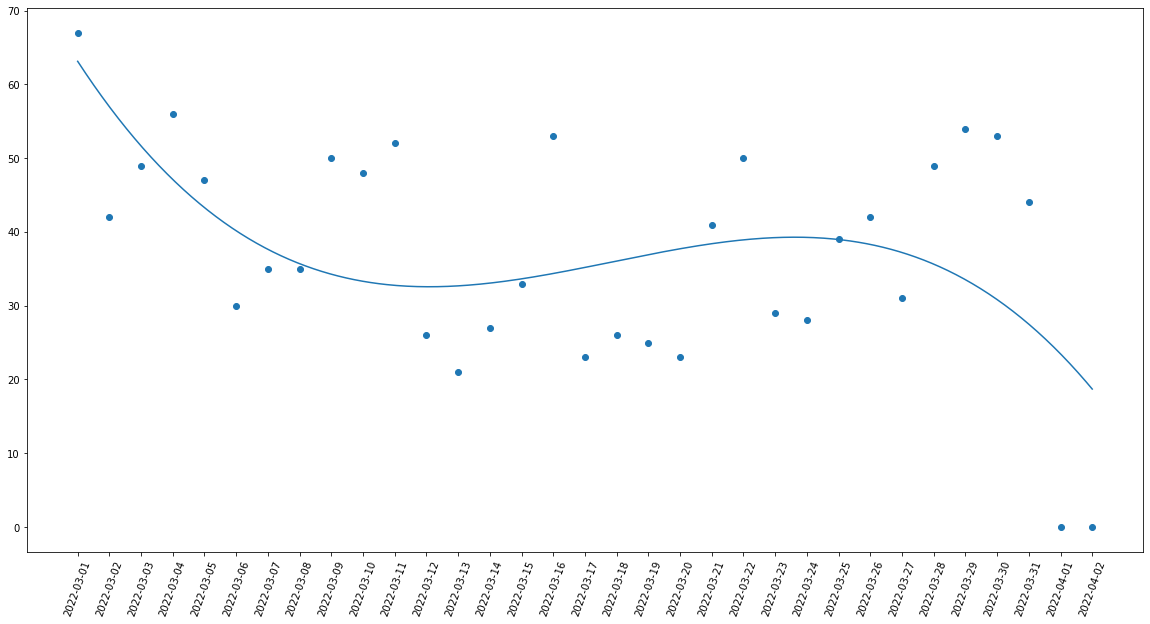

R-Squared Score = 0.3044920678866919


In [131]:
timeplot(vanma,3)

In [121]:
vancoast_all = mydata[mydata["HA"]=="Vancouver Coastal"].reset_index().drop(columns="index")

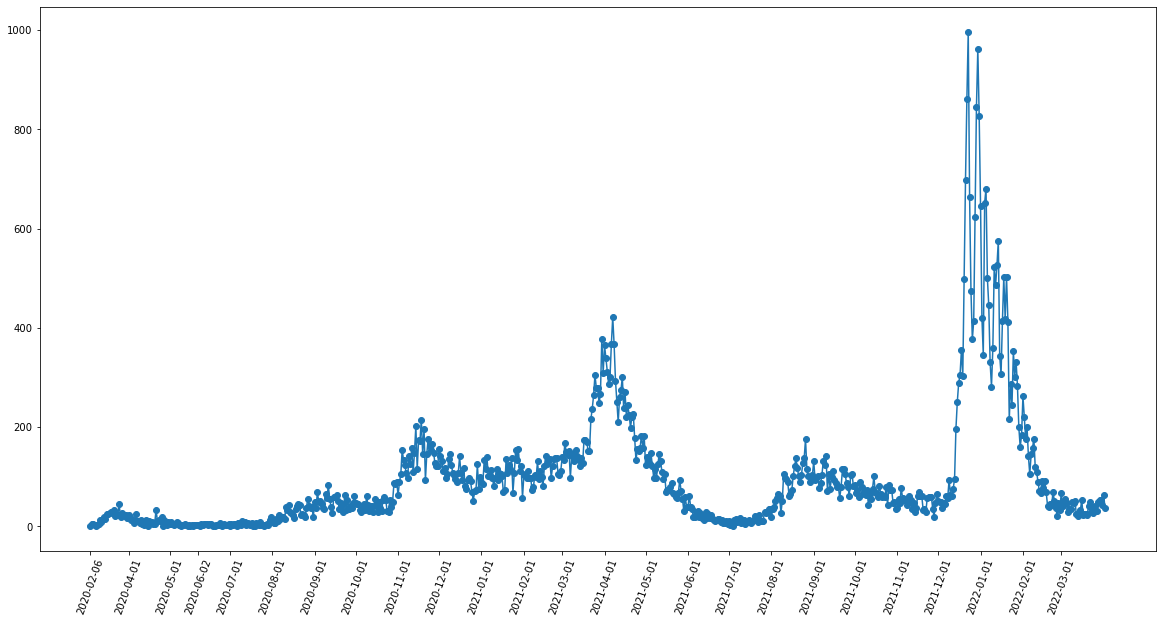

Total Case Counts = 72259


In [139]:
all_dates = pd.unique(vancoast_all["Reported_Date"])
case_counts = []
for i in all_dates:
    case_counts.append(sum(vancoast_all["Reported_Date"] == i))

fig,ax=plt.subplots(1,1,figsize=(20,10)) 
plt.xticks(rotation=70)

ax.plot(all_dates,np.array(case_counts))
ax.scatter(all_dates,np.array(case_counts))
ax.xaxis.set_ticks(['2020-02-06','2020-04-01', '2020-05-01',
                   '2020-06-02', '2020-07-01','2020-08-01', '2020-09-01',
                   '2020-10-01', '2020-11-01','2020-12-01', '2021-01-01',
                   '2021-02-01', '2021-03-01','2021-04-01', '2021-05-01',
                   '2021-06-01', '2021-07-01','2021-08-01', '2021-09-01',
                   '2021-10-01', '2021-11-01','2021-12-01', '2022-01-01', 
                    '2022-02-01','2022-03-01'])
plt.show()
print("Total Case Counts = "+str(sum(case_counts)))

# Information about COVID-19 Cases in BC:

- https://bc.ctvnews.ca/scroll-through-this-timeline-of-the-1st-year-of-covid-19-in-b-c-1.5284929
- https://en.wikipedia.org/wiki/COVID-19_pandemic_in_British_Columbia

# Recent Updates:

- January 2022: Delta vaccine released
- January 2022: School resumes, post-secondary schooling to be held online
- February 2022: Post-secondary schooling returns to in-person
- February 2022: Plans to remove some restrictions, but will be keeping vaccine passports
- February-March 2022: Anti-vaccine/mask protests held
- March 2022: Plans to remove mask mandates and vaccine passports

# Infection Trends:

- Jan 2-8: Sharp increase in COVID-19 counts due to Omicron variant and holidays, peak counts obtained
- Jan 9-15: Slight decrease in infection counts due to online schooling among the 15-19, 20-39, and 40-59 age groups; since non-post secondary schooling was held in person, infection rates increased among the 0-4, 5-9, and 10-14 age groups
- Jan 16-22: Cases did not change much from previous week
- Jan 23-29: Cases decrease sharply due to the Delta vaccine
- Jan 30-Feb 5: Triple vaccination rates sharply increase; infections rates sharply decrease as a result. <10 age range counts decreased the most due to availability of vaccination for age group
- Feb 6-12: Sharp decrease in COVID-19 counts due to increased vaccination; in-person post-secondary schooling resumes, but infection rates decrease among all age groups
- Feb 13-19: Sharp decrease in COVID-19 counts, speculation about removing some COVID-19 restrictions, anti-vaccination convoy gains traction
- Feb 20-26: Sharp decrease in COVID-19 counts, anti-vaccination convoy reaches peak

Current adult double vaccination rate: >93%

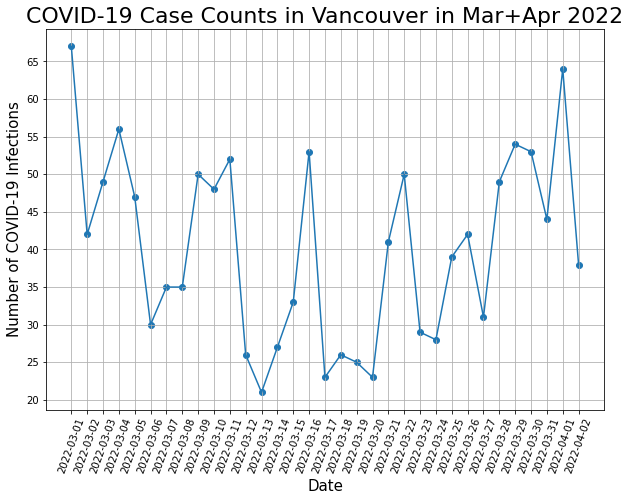

Total Case Counts = 1330


<ipython-input-144-e7fa9eabdcec>:18: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "linewidth" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig('covidcounts.png',linewidth=3, dpi = 80, transparent=True, format = 'png')


In [144]:
all_dates = pd.unique(vanma["Reported_Date"])
case_counts = []
for i in all_dates:
    case_counts.append(sum(vanma["Reported_Date"] == i))

fig,ax=plt.subplots(1,1,figsize=(10,7)) 
plt.xticks(rotation=70)
plt.title("COVID-19 Case Counts in Vancouver in Mar+Apr 2022", fontsize=22)
plt.xlabel("Date", fontsize=15)
plt.ylabel("Number of COVID-19 Infections", fontsize=15)
plt.yticks(np.arange(20,max(case_counts)+1,5))

ax.plot(all_dates,np.array(case_counts))
ax.scatter(all_dates,np.array(case_counts))
plt.grid()
plt.show()
print("Total Case Counts = "+str(sum(case_counts)))
#fig.savefig('covidcounts.png',linewidth=3, dpi = 80, transparent=True, format = 'png')

In [150]:
monthlies = vancoast_all[vancoast_all["Reported_Date"].str.contains("2021-11|2021-12|2022-01|2022-02|2022-03")].reset_index().drop(columns="index")

In [151]:
monthlies

,Reported_Date,HA,Sex,Age_Group,Classification_Reported
0,2021-11-01,Vancouver Coastal,F,<10,Lab-diagnosed
1,2021-11-01,Vancouver Coastal,M,50-59,Lab-diagnosed
2,2021-11-01,Vancouver Coastal,F,<10,Lab-diagnosed
3,2021-11-01,Vancouver Coastal,M,10-19,Lab-diagnosed
4,2021-11-01,Vancouver Coastal,M,<10,Lab-diagnosed
...,...,...,...,...,...
28506,2022-03-31,Vancouver Coastal,M,60-69,Lab-diagnosed
28507,2022-03-31,Vancouver Coastal,M,70-79,Lab-diagnosed
28508,2022-03-31,Vancouver Coastal,F,10-19,Lab-diagnosed
28509,2022-03-31,Vancouver Coastal,M,80-89,Lab-diagnosed


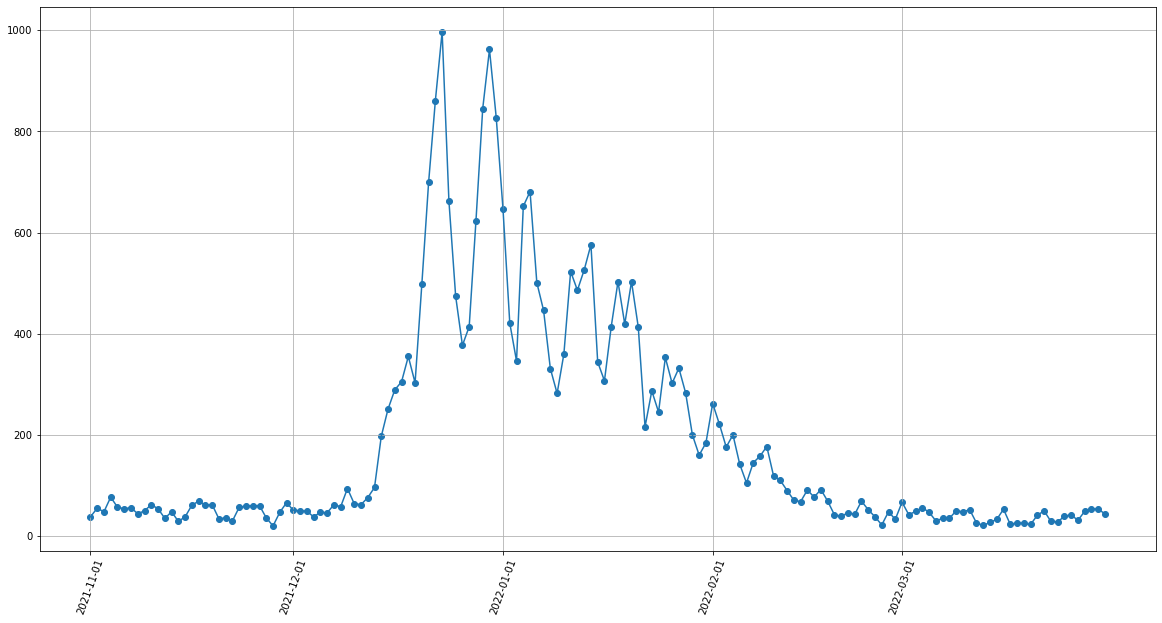

Total Case Counts = 28511


In [153]:
all_dates = pd.unique(monthlies["Reported_Date"])
case_counts = []
for i in all_dates:
    case_counts.append(sum(monthlies["Reported_Date"] == i))

fig,ax=plt.subplots(1,1,figsize=(20,10)) 
plt.xticks(rotation=70)

ax.plot(all_dates,np.array(case_counts))
ax.scatter(all_dates,np.array(case_counts))
ax.xaxis.set_ticks(['2021-11-01','2021-12-01', '2022-01-01', 
                    '2022-02-01','2022-03-01'])
plt.grid()
plt.show()
print("Total Case Counts = "+str(sum(case_counts)))

In [158]:
n21 = monthlies[monthlies["Reported_Date"].str.contains("2021-11")].reset_index().drop(columns="index")
d21 = monthlies[monthlies["Reported_Date"].str.contains("2021-12")].reset_index().drop(columns="index")
j22 = monthlies[monthlies["Reported_Date"].str.contains("2022-01")].reset_index().drop(columns="index")
f22 = monthlies[monthlies["Reported_Date"].str.contains("2022-02")].reset_index().drop(columns="index")
m22 = monthlies[monthlies["Reported_Date"].str.contains("2022-03")].reset_index().drop(columns="index")

In [160]:
n21count = np.shape(n21)[0]
d21count = np.shape(d21)[0]
j22count = np.shape(j22)[0]
f22count = np.shape(f22)[0]
m22count = np.shape(m22)[0]

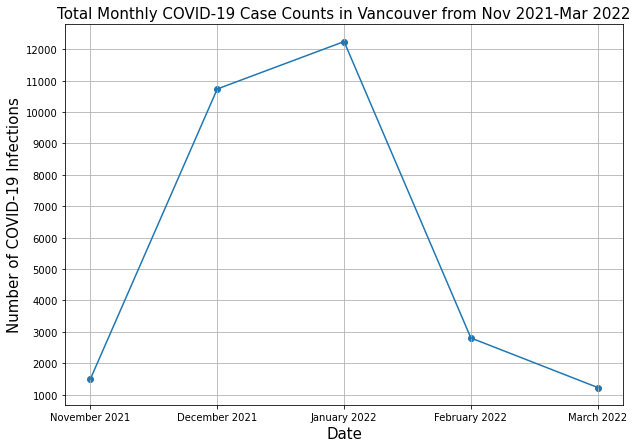

Total Case Counts = 28511


<ipython-input-187-d3784db85233>:18: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "linewidth" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig('monthcounts.png',linewidth=3, dpi = 80, transparent=True, format = 'png')


In [187]:
mstarts = ["November 2021","December 2021","January 2022","February 2022","March 2022"]
mcounts = np.array([n21count,d21count,j22count,f22count,m22count])

fig,ax=plt.subplots(1,1,figsize=(10,7)) 
plt.xticks(rotation=0)

plt.title("Total Monthly COVID-19 Case Counts in Vancouver from Nov 2021-Mar 2022", fontsize=15)
plt.xlabel("Date", fontsize=15)
plt.ylabel("Number of COVID-19 Infections", fontsize=15)
plt.yticks(np.arange(1000,max(mcounts)+500,1000))

plt.plot(mstarts,mcounts)
plt.scatter(mstarts,mcounts)
plt.grid()
plt.show()

print("Total Case Counts = "+str(sum(mcounts)))
#fig.savefig('monthcounts.png',linewidth=3, dpi = 80, transparent=True, format = 'png')

In [186]:
np.shape(d21)[0]+np.shape(j22)[0]

22975